# Figures

This notebook provides the code needed to generate the figures used in the paper.
It is noted that some graphs might be generated inside the corresponding notebook of the experiment and thus those graphs are not created here.


## Table of Contents

- Checking requirements
  - Correct anaconda environment
  - Correct module access
  - Correct file access
  - Checking TensorFlow GPU support
- Funding for neural interface ventures
- Papers on BCIs
- Longer window subject wise mean accuracy
- Prediction times

<hr><hr>

## Checking requirements

### Correct anaconda environment

The `bci-master-thesis` anaconda environment should be active to ensure proper support. Installation instructions are available on [the GitHub repository of the BCI master thesis project](https://www.github.com/pikawika/bci-master-thesis).

In [2]:
####################################################
# CHECKING FOR RIGHT ANACONDA ENVIRONMENT
####################################################

import os
from platform import python_version
from pathlib import Path
from copy import copy

print(f"Active environment: {os.environ['CONDA_DEFAULT_ENV']}")
print(f"Correct environment: {os.environ['CONDA_DEFAULT_ENV'] == 'bci-master-thesis'}")
print(f"\nPython version: {python_version()}")
print(f"Correct Python version: {python_version() == '3.8.10'}")

Active environment: bci-master-thesis
Correct environment: True

Python version: 3.8.10
Correct Python version: True


<hr>

### Correct module access

The following codeblock will load in all required modules and show if the versions match those that are recommended.

In [3]:
####################################################
# LOADING MODULES
####################################################

# allow reloading of libraries
import importlib

# Load utils with reloading allowed
import sys
sys.path.append('../utils')
import CLA_dataset
import TF_tools
importlib.reload(CLA_dataset)
importlib.reload(TF_tools)

# More data types
import pandas as pd
import numpy as np

# Plotting
import matplotlib; print(f"Matplotlib version (3.5.1 recommended): {matplotlib.__version__}")
import matplotlib.pyplot as plt

Matplotlib version (3.5.1 recommended): 3.5.1


<hr>

### Correct file access

As mentioned, this notebook might make use of a database provided by [Kaya et al](https://doi.org/10.1038/sdata.2018.211). The CLA dataset in particular. Instructions on where to get the data are available on [the GitHub repository of the BCI master thesis project](https://www.github.com/pikawika/bci-master-thesis). These instructions are under `bci-master-thesis/code/data/CLA/README.md`. FIF files from this same dataset are also made available in [the GitHub repository of the BCI master thesis project](https://www.github.com/pikawika/bci-master-thesis). A check on the availability of these two datasets is performed below.

In [4]:
####################################################
# CHECKING FILE ACCESS
####################################################

# Use util to determine if we have access
print("Full Matlab CLA file access: " + str(CLA_dataset.check_matlab_files_availability()))
print("Full MNE CLA file access: " + str(CLA_dataset.check_mne_files_availability()))

Full Matlab CLA file access: True
Full MNE CLA file access: True


<hr>

### Checking TensorFlow GPU support

If you want to use TensorFlow with GPU acceleration, the below codeblock can help you gather insight.

In [5]:
TF_tools.check_tf_cpu_gpu_presence()

There are 1 CPUs available under the names:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


There are 1 GPUs available under the names:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


<hr><hr>

## Funding for neural interface ventures

Graphs related to data on funding for neural interface ventures by [Rao (2020)](https://www.from-the-interface.com/BCI-venture-funding/).
Please provide the data obtainable by clicking "Get the data" [under the figure on this webpage](https://www.from-the-interface.com/BCI-venture-funding/) in the folder `../data/figures/funding_data.csv`.

### Creating the graph

In [5]:
####################################################
# LOADING IN DATA
####################################################

data_filename = "../data/figures/funding_data.csv"

if (not os.path.isfile(data_filename)):
    print("Required data not available")
else:
    funding_data = pd.read_csv(data_filename)
    display(funding_data)
    
del data_filename

,Company,Location,Year_founded,Application,Funding to date
0,Neuralink,San Francisco Bay Area,01/07/16,Medical Device,158.0
1,Kernel,Other US,01/01/16,Research Device,107.0
2,Dreem,Europe,01/07/14,Consumer Device,57.0
3,GTX-Medical,Europe,01/01/13,Medical Device,41.2
4,Clinatec,Europe,01/01/11,Medical Device,39.4
5,Muse,Canada,01/01/15,Consumer Device,28.8
6,Paradromics,Other US,01/01/15,Medical Device,25.3
7,Halo-Neuroscience,San Francisco Bay Area,01/01/13,Consumer Device,24.7
8,Meltin-MMI,Japan,19/07/13,Consumer Device,20.6
9,Clinatec,Europe,01/01/11,Medical Device,20.1


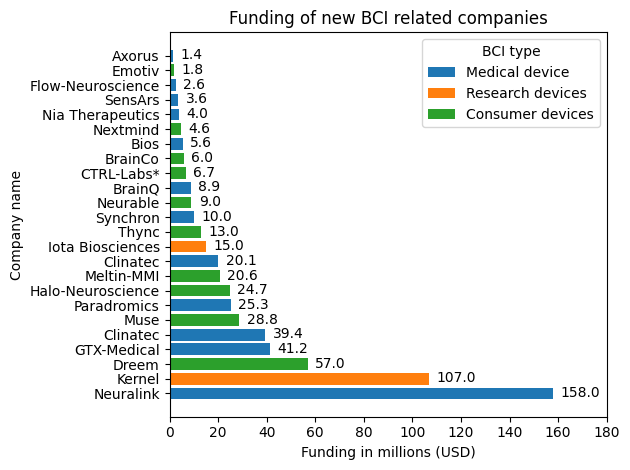

In [6]:
####################################################
# PLOTTING FUNDING DATA
####################################################

# reset plots
plt.rcdefaults()
fig, ax = plt.subplots()

# Order data
funding_data = funding_data.sort_values(by=["Funding to date"])

# General info
companies = funding_data["Company"]
y_pos = np.arange(len(companies))

# Data for Medical devices
funding = funding_data.where(funding_data["Application"] == "Medical Device")["Funding to date"]
ax.barh(y_pos, funding, align='center', label="Medical device")

# Data for Research devices
funding = funding_data.where(funding_data["Application"] == "Research Device")["Funding to date"]
ax.barh(y_pos, funding, align='center', label="Research devices")

# Data for Consumer devices
funding = funding_data.where(funding_data["Application"] == "Consumer Device")["Funding to date"]
ax.barh(y_pos, funding, align='center', label="Consumer devices")


# Make plot prettier
companies = funding_data["Company"]
ax.set_yticks(y_pos, labels=companies)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Funding in millions (USD)')
ax.set_ylabel('Company name')
ax.set_title('Funding of new BCI related companies')
plt.xlim(right=180)

# Show funding value
for i, v in enumerate(funding_data["Funding to date"]):
    ax.text(v + 3, i + .25, str(v), color='black')

# Show the legend
plt.legend(title = "BCI type")

# Save the plot
plt.tight_layout()
plt.savefig('figures/A-figures/funding.png', dpi=300)

# Show the plot
plt.show()

<hr><hr>

## Papers on BCIs

Graphs related to the amount of papers on BCIs, data by [Saha et al (2021)](https://doi.org/10.3389/fnsys.2021.578875).

### Creating the graph

In [10]:
####################################################
# LOADING IN DATA
####################################################

# initialize list of lists
data = [['1979-1993', 30],
        ['1994-1996', 44],
        ['1997-1999', 61],
        ['2000-2002', 95],
        ['2003-2005', 306],
        ['2006-2008', 594],
        ['2009-2011', 922],
        ['2012-2014', 1739],
        ['2015-2017', 2053],
        ['2018-2020', 2224]]
  
# Create the pandas DataFrame
data = pd.DataFrame(data, columns=['Year', 'Amount'])
  
# print dataframe.
data

,Year,Amount
0,1979-1993,30
1,1994-1996,44
2,1997-1999,61
3,2000-2002,95
4,2003-2005,306
5,2006-2008,594
6,2009-2011,922
7,2012-2014,1739
8,2015-2017,2053
9,2018-2020,2224


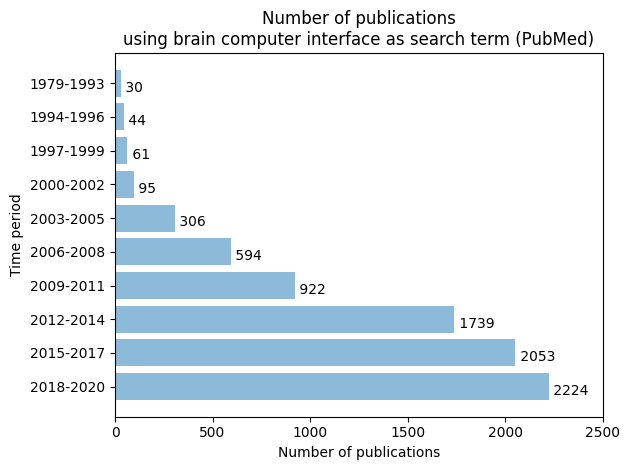

In [11]:
####################################################
# PLOTTING FUNDING DATA
####################################################

# reset plots
plt.rcdefaults()
fig, ax = plt.subplots()

# Order data
data = data.sort_values(by=["Year"])

# General info
years = data["Year"]
y_pos = np.arange(len(years))

# Show bar plot
amount_of_paper = data["Amount"]
ax.barh(y_pos, amount_of_paper, align='center', alpha=0.5)


# Make plot prettier
ax.set_yticks(y_pos, labels=years)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of publications')
ax.set_ylabel('Time period')
ax.set_title('Number of publications\nusing brain computer interface as search term (PubMed)')
plt.xlim(right=2500)

# Show amount value
for i, v in enumerate(data["Amount"]):
    ax.text(v + 3, i + .25, " " + str(v), color='black')

# Save the plot
plt.tight_layout()
plt.savefig('figures/A-figures/papers_on_bci.png', dpi=300)

# Show the plot
plt.show()

<hr><hr>

## Longer window subject wise mean accuracy

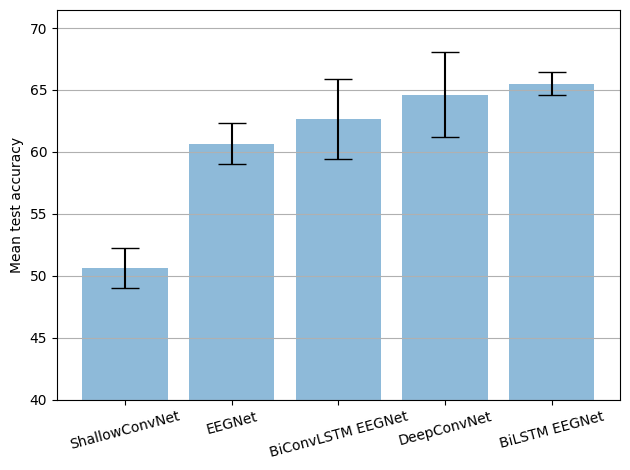

In [12]:
####################################################
# PLOTTING FUNDING DATA
####################################################

names = ['ShallowConvNet', 'EEGNet', 'BiConvLSTM EEGNet', 'DeepConvNet', 'BiLSTM EEGNet']
x_pos = np.arange(len(names))
CTEs = [50.66, 60.68, 62.68, 64.61, 65.52]
error  = [1.60, 1.64, 3.21, 3.44, 0.89]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Mean test accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.xticks(rotation = 15)
plt.ylim(bottom=40)
#ax.set_title('Mean test accuracies and their standard deviation\nfrom the longer window experiments in an intersubject evaluation setting')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('figures/A-figures/new_subject_longer_window.png', dpi=300)
plt.show()

<hr><hr>

## Prediction times

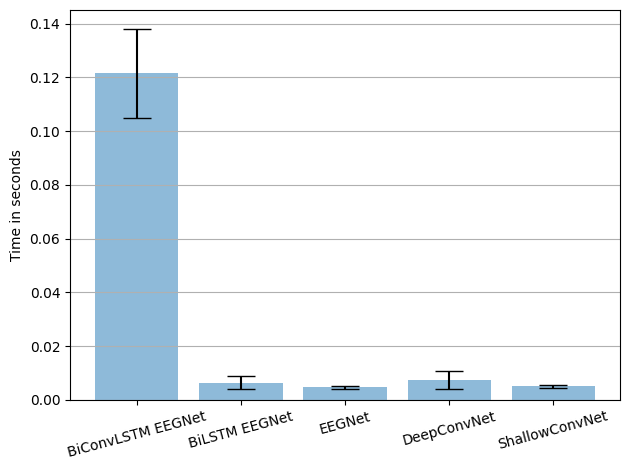

In [13]:
####################################################
# PLOTTING FUNDING DATA
####################################################

names = ['BiConvLSTM EEGNet', 'BiLSTM EEGNet', 'EEGNet', 'DeepConvNet', 'ShallowConvNet']
x_pos = np.arange(len(names))
CTEs = [0.1216, 0.0064, 0.0046, 0.0074, 0.005]
error  = [0.0166, 0.0025, 0.0004, 0.0034, 0.0005]

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Time in seconds')
ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.xticks(rotation = 15)
#plt.ylim(bottom=40)
#ax.set_title('Mean test accuracies and their standard deviation\nfrom the longer window experiments in an intersubject evaluation setting')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('figures/A-figures/prediction_time.png', dpi=300)
plt.show()